In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Downloads/GlobalLandTemperaturesByState.csv")

In [4]:
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
dt                               645675 non-null object
AverageTemperature               620027 non-null float64
AverageTemperatureUncertainty    620027 non-null float64
State                            645675 non-null object
Country                          645675 non-null object
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [31]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [6]:
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,645675
Total Missing (%),1.6%
Total size in memory,24.6 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [8]:
df_numerical=df._get_numeric_data()

In [9]:
df_numerical.head(5)

,AverageTemperature,AverageTemperatureUncertainty
0,25.544,1.171
1,24.228,1.103
2,24.371,1.044
3,25.427,1.073
4,25.675,1.014


In [15]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df_numerical.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
AverageTemperature,620027.0,25648.0,5575971.496,8.993111,11.199,13.772150,189.672123,-45.389,-27.318,-15.828,-10.354,-0.693,11.199,19.899,25.659,27.296,30.357,36.339
AverageTemperatureUncertainty,620027.0,25648.0,798376.000,1.287647,0.656,1.360392,1.850667,0.036,0.126,0.179,0.216,0.316,0.656,1.850,3.417,4.169,5.636,12.646


In [16]:
df_cat=df.select_dtypes(include=['object'])

In [17]:
df_cat.head(5)

,dt,State,Country
0,1855-05-01,Acre,Brazil
1,1855-06-01,Acre,Brazil
2,1855-07-01,Acre,Brazil
3,1855-08-01,Acre,Brazil
4,1855-09-01,Acre,Brazil


In [18]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=df_cat.apply(lambda x: cat_summary(x))
cat_summary

,dt,State,Country
N,645675,645675,645675
NMISS,0,0,0
ColumnsNames,1925-08-01 241 1974-08-01 241 1942-02-01...,Smolensk 3239 Tver' ...,Russia 254972 United States 14974...


In [19]:
#handling outliers
df['AverageTemperatureUncertainty']= df['AverageTemperatureUncertainty'].clip_upper(df['AverageTemperatureUncertainty'].quantile(0.99)) 
df['AverageTemperatureUncertainty']= df['AverageTemperatureUncertainty'].clip_lower(df['AverageTemperatureUncertainty'].quantile(0.01))

In [20]:
num_summary=df_numerical.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
AverageTemperature,620027.0,25648.0,5575971.496,8.993111,11.199,13.772150,189.672123,-45.389,-27.318,-15.828,-10.354,-0.693,11.199,19.899,25.659,27.296,30.357,36.339
AverageTemperatureUncertainty,620027.0,25648.0,792160.651,1.277623,0.656,1.319771,1.741795,0.126,0.126,0.179,0.216,0.316,0.656,1.850,3.417,4.169,5.636,5.636


In [21]:
#handling missings
#filling with mean
def Missing(x):
    x = x.fillna(x.mean())
    return x

df_numerical=df_numerical.apply(lambda x: Missing(x))

In [23]:
num_summary=df_numerical.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
AverageTemperature,645675.0,0.0,5.806627e+06,8.993111,10.376,13.495844,182.137809,-45.389,-27.064,-15.5213,-10.005,-0.106,10.376,19.533,25.533,27.2133,30.27326,36.339
AverageTemperatureUncertainty,645675.0,0.0,8.249291e+05,1.277623,0.713,1.293293,1.672606,0.126,0.127,0.1800,0.219,0.323,0.713,1.773,3.364,4.1350,5.59300,5.636


In [25]:
import seaborn as sns

In [26]:
df_new=pd.concat([df_numerical,df_cat],axis=1)

In [27]:
df_new.head(5)

,AverageTemperature,AverageTemperatureUncertainty,dt,State,Country
0,25.544,1.171,1855-05-01,Acre,Brazil
1,24.228,1.103,1855-06-01,Acre,Brazil
2,24.371,1.044,1855-07-01,Acre,Brazil
3,25.427,1.073,1855-08-01,Acre,Brazil
4,25.675,1.014,1855-09-01,Acre,Brazil


In [29]:
pandas_profiling.ProfileReport(df_new)


Number of variables,5
Number of observations,645675
Total Missing (%),0.0%
Total size in memory,24.6 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [30]:
sns.distplot(df_new.AverageTemperature)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


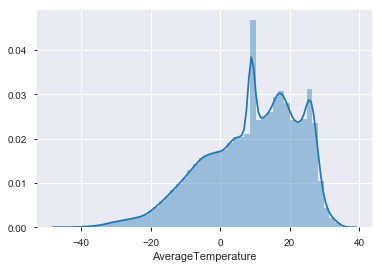

In [32]:
sns.distplot(df_new.AverageTemperature)

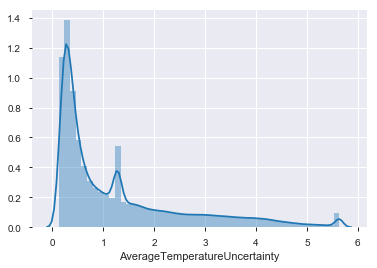

In [55]:
sns.distplot(df_new.AverageTemperatureUncertainty)

In [56]:
import numpy as np

In [58]:
df_new["ln_AverageTemperatureUncertainty"]= np.log(df_new["AverageTemperatureUncertainty"]+1)

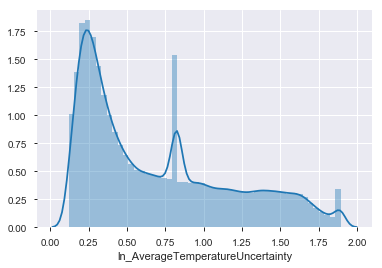

In [60]:
sns.distplot(df_new.ln_AverageTemperatureUncertainty)

In [61]:
df_new=df_new.drop(['ln_AverageTemperatureUncertainty'],axis=1)

In [62]:
df_new.head(5)

,AverageTemperature,AverageTemperatureUncertainty,dt,State,Country
0,25.544,1.171,1855-05-01,Acre,Brazil
1,24.228,1.103,1855-06-01,Acre,Brazil
2,24.371,1.044,1855-07-01,Acre,Brazil
3,25.427,1.073,1855-08-01,Acre,Brazil
4,25.675,1.014,1855-09-01,Acre,Brazil


In [63]:
df_new.corr()

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.224282
AverageTemperatureUncertainty,-0.224282,1.000000


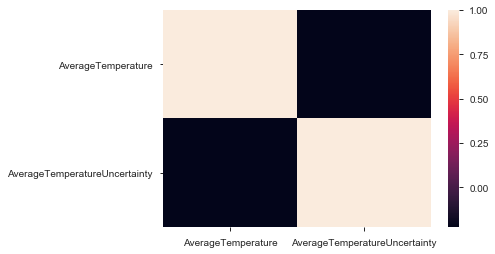

In [64]:
sns.heatmap(df_new.corr())